In [158]:
import cv2
import pylab as plt
import numpy as np
from PIL import Image
%matplotlib inline

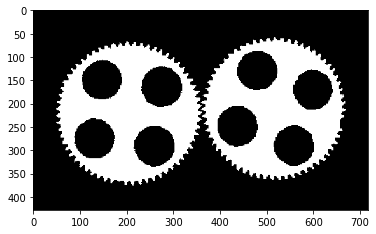

In [159]:
source_image = cv2.imread('gears.png')
plt.imshow(source_image);

In [160]:
def get_ring(n, thickness = 2):
    small_ring = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n - thickness, n - thickness))
    big_ring = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
    res = np.array(big_ring)
    step = int(thickness/2)
    for i in range(n-thickness):
        for j in range(n-thickness):
            res[i+step][j+step] = small_ring[i][j] ^ big_ring[i+step][j+step]
    return  res

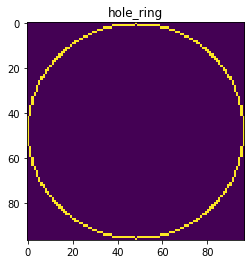

In [161]:
hole_size = 97
hole_ring = get_ring(hole_size, 2)
erosion = cv2.erode(img, hole_ring, iterations=1)
plt.title("hole_ring")
plt.imshow(hole_ring)

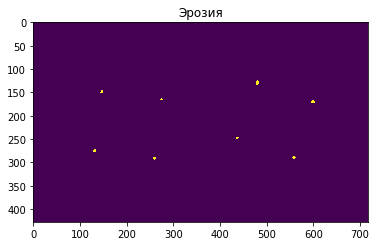

In [162]:
plt.title("Эрозия")
plt.imshow(erosion);

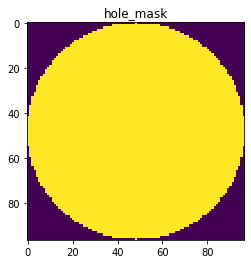

In [163]:
hole_mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (hole_size, hole_size))
dilation = cv2.dilate(erosion, hole_mask)
plt.title("hole_mask")
plt.imshow(hole_mask)

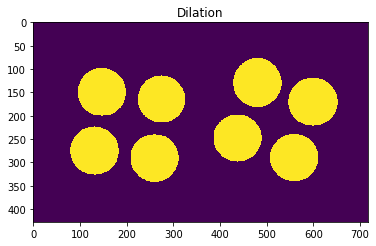

In [164]:
plt.title("Dilation")
plt.imshow(dilation);

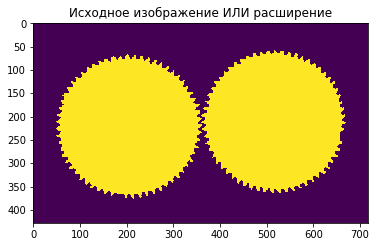

In [165]:
image3 = cv2.bitwise_or(img, dilation)
plt.title("Исходное изображение ИЛИ расширение")
plt.imshow(image3)

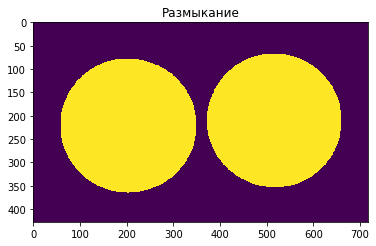

In [178]:
gear_size = 280
gear_body = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (gear_size, gear_size))
image4 = cv2.morphologyEx(image3, cv2.MORPH_OPEN, gear_body)
plt.title("Размыкание")
plt.imshow(image4);

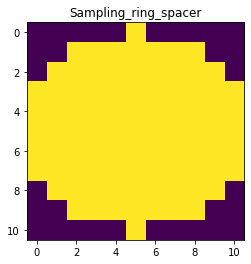

In [167]:
ring_spacer_size = 11
sampling_ring_spacer = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ring_spacer_size, ring_spacer_size))
image5 = cv2.dilate(image4, sampling_ring_spacer)
plt.title("Sampling_ring_spacer")
plt.imshow(sampling_ring_spacer);

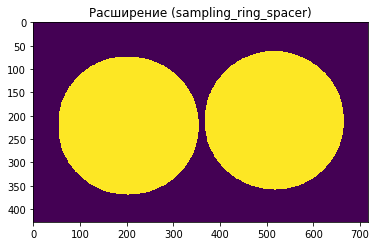

In [168]:
plt.title("Расширение (sampling_ring_spacer)")
plt.imshow(image5);

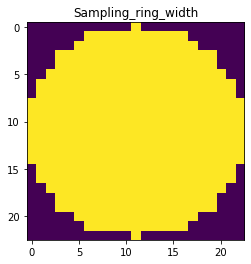

In [169]:
ring_width_size = 23;
sampling_ring_width= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ring_width_size, ring_width_size))
image6 = cv2.dilate(image5, sampling_ring_width)
plt.title("Sampling_ring_width")
plt.imshow(sampling_ring_width);

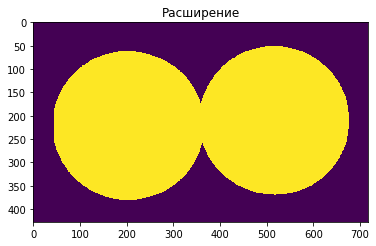

In [170]:
plt.title("Расширение")
plt.imshow(image6);

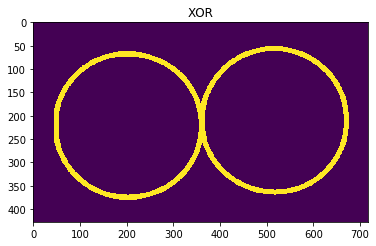

In [179]:
image7 = cv2.bitwise_xor(image5, image6)
plt.title("XOR")
plt.imshow(image7);

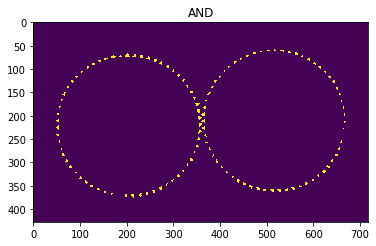

In [172]:
image8 = cv2.bitwise_and(img, image7)
plt.title("AND")
plt.imshow(image8);

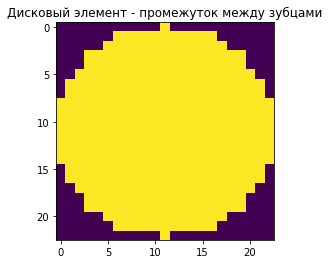

In [173]:
tip_spacing_size = 23
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (tip_spacing_size, tip_spacing_size))
image9 = cv2.dilate(image8, tip_spacing)

plt.title("Дисковый элемент - промежуток между зубцами")
plt.imshow(tip_spacing);

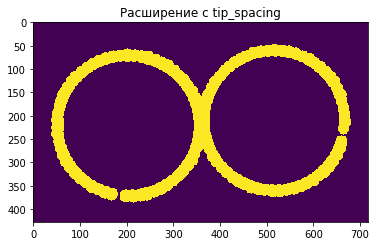

In [174]:
plt.title("Расширение с tip_spacing")
plt.imshow(image9);

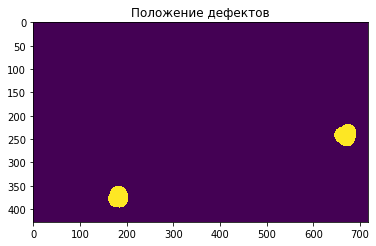

In [180]:
image10 = cv2.subtract(image7, image9)
save_np_as_image(image10, '010.jpg')
defect_cue_size = 35
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (defect_cue_size, defect_cue_size))
image10 = cv2.dilate(image10, defect_cue)
result = cv2.bitwise_or(image10 ,image9)

plt.title("Положение дефектов")
plt.imshow(image10);

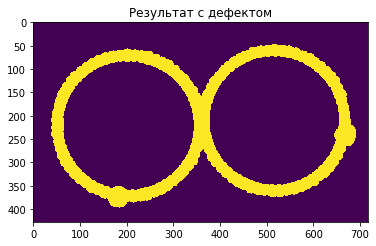

In [176]:
plt.title("Результат с дефектом")
plt.imshow(result);